# Deep Learning Walkthrough: Handwriting Recognition with Neural Networks 

This chapter contains a step-by-step tutorial on how to build a simple image classifier for handwriting recognition using artificial neural networks. Like many tutorials, we are going to use the famous [MNIST](https://en.m.wikipedia.org/wiki/MNIST_database) dataset of handwritten digits. Unlike many tutorials, we are not just going to walk through the code, but use it to introduce the fundamentals of neural networks and deep learning.

## Preamble

We are going to build a neural network with the [**TensorFlow**](https://www.tensorflow.org/) framework, mainly through the [**Keras**](https://keras.io/) API. TensorFlow itself is a fairly low-level engine for efficient numerical computing with tensors - the mathematical foundation of neural networks. Keras is a more high-level API for working with neural network models, and it uses TensorFlow as its backend.

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy
import matplotlib.pyplot as plt
import seaborn
import pandas

In [3]:
import ai_dojo
ai_dojo.setup_plot_style(dark=True)

##  The Dataset

The [MNIST](https://en.m.wikipedia.org/wiki/MNIST_database) dataset is a famous benchmark for handwriting recognition performance. The task is to recognize a handwritten digit from a small grayscale image, i.e. classification with 10 classes.

In [4]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
numpy.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
n_classes = 10

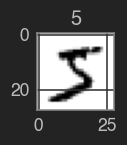

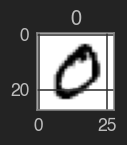

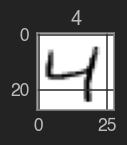

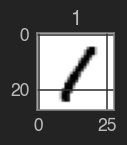

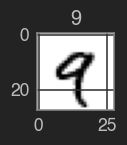

In [8]:
for i in range(5):
    plt.figure(figsize=(1,1))
    plt.imshow(X_train[i], cmap="binary")
    plt.title(y_train[i])

### Preprocessing

As a preprocessing step before training, the grayscale pixel data is scaled to the interval $[0,1]$:

In [9]:
X_train, X_test = X_train / 255.0, X_test / 255.0


## The Network

Here is the complete workflow for neural network construction, training and classifying:

In [10]:
net = keras.models.Sequential([
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation="relu"),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(n_classes, activation="softmax")
])
net.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
net.fit(
    X_train, 
    y_train, 
    epochs=10, 
)
y_pred = numpy.argmax(net.predict(X_test), axis=1)

Epoch 1/10


2022-11-12 10:38:08.413880: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 3s 1ms/step - loss: 0.2981 - accuracy: 0.9143
Epoch 2/10
1875/1875 [==============================] - 2s 990us/step - loss: 0.1412 - accuracy: 0.9585
Epoch 3/10
1875/1875 [==============================] - 2s 909us/step - loss: 0.1074 - accuracy: 0.9679
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0870 - accuracy: 0.9729
Epoch 5/10
1875/1875 [==============================] - 2s 927us/step - loss: 0.0744 - accuracy: 0.9768
Epoch 6/10
1875/1875 [==============================] - 2s 994us/step - loss: 0.0678 - accuracy: 0.9785
Epoch 7/10
1875/1875 [==============================] - 2s 913us/step - loss: 0.0607 - accuracy: 0.9803
Epoch 8/10
1875/1875 [==============================] - 2s 933us/step - loss: 0.0542 - accuracy: 0.9825
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0502 - accuracy: 0.9834
Epoch 10/10
313/313 [==============================] - 0s 670us/step


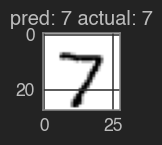

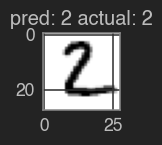

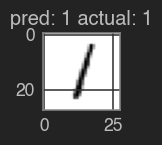

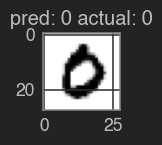

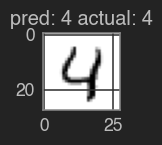

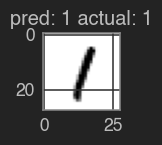

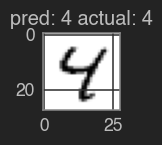

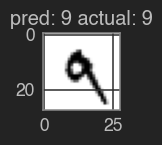

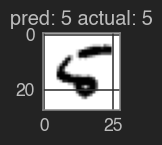

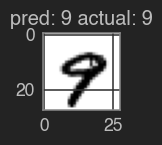

In [11]:
for i in range(10):
    plt.figure(figsize=(1,1))
    plt.imshow(X_test[i], cmap="binary")
    plt.title(f"pred: {y_pred[i]} actual: {y_test[i]}")

A couple of lines of Python - that's it. Now you are ready for deep learning. 

Just kidding. There is a lot going on in these few lines. Let's start again and go step by step.

### Artificial Neurons

An **artificial neuron** is the fundamental unit of artificial neural networks. Similar to how biological neurons receive signals and fire when triggered, an artificial neuron computes a weighted sum of inputs, passes it through an activation function and outputs a value. 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7d/Artificial_neuron-2.gif/320px-Artificial_neuron-2.gif)


The output of the $k$-th neuron is

$$y_k =  \varphi \left( \sum_{j=0}^m w_{kj} x_j \right)$$

where:

- $\varphi$: activation function
- $w_{kj} \in w$: weights 
- $x_j \in x$: inputs

We can also write this more briefly in vector notation:

$$y_k = \varphi \left ( w x \right )$$

#### Example: Single Neuron with Keras

Keras is certainly overkill if a single neuron with one input is all we want, but here we go:

In [12]:
neuron = keras.models.Sequential(
    [
      keras.layers.Dense(
          units=1, 
          input_shape=(1,),
          activation="tanh",
          kernel_initializer="uniform", 
        )  
    ]
)

In [13]:
neuron.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


With `keras`, we think about neural networks as composed of **layers** - more on them later. We have defined a `Sequential` model, a **feed-forward neural network** in which the input passes through a sequence of layers.

Above we have added one layer with the following parameters:

- **units**: the number of neurons in the layer
- **input shape**: The dimensions of the input array that the layer expects. (Much of network architecture debugging will be about getting the data into the right shape.)
- **activation**: The _activation function_
- **kernel initializer**: How to set the initial weights - here: uniformly at random.

We can look at the weights for the edges connecting the inputs to the neuron:

In [14]:
neuron.get_weights()

[array([[-0.02608044]], dtype=float32), array([0.], dtype=float32)]

The neuron is now ready to receive inputs:

In [15]:
X = numpy.eye(3,1)
X

array([[1.],
       [0.],
       [0.]])

In [16]:
neuron.predict(X)

1/1 [==============================] - 0s 34ms/step


array([[-0.02607453],
       [ 0.        ],
       [ 0.        ]], dtype=float32)

The following method call sets up the model for training. (We will get to what the parameters mean shortly).

In [17]:
neuron.compile(
    optimizer="adam",
    loss="mse"
)

Let's generate some simple data that we want to model:

In [18]:
n = 1000
X = numpy.linspace(0.0, 1.0, n)
y = 0.8 * X + numpy.random.normal(0.0, 0.2, n)

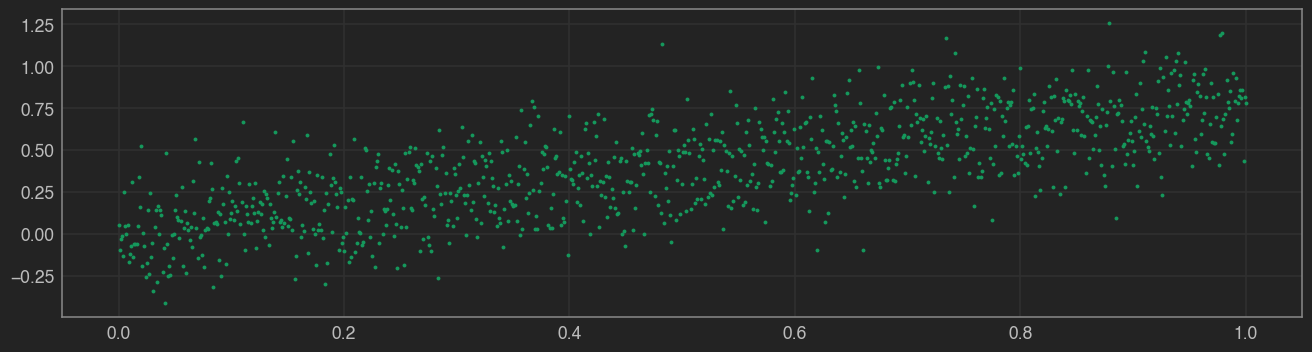

In [19]:
plt.plot(X, y, '.')

If we give the data points to the untrained network and ask for a prediction, we do not get a very useful answer:

In [20]:
y_pred = neuron.predict(X)

32/32 [==============================] - 0s 730us/step


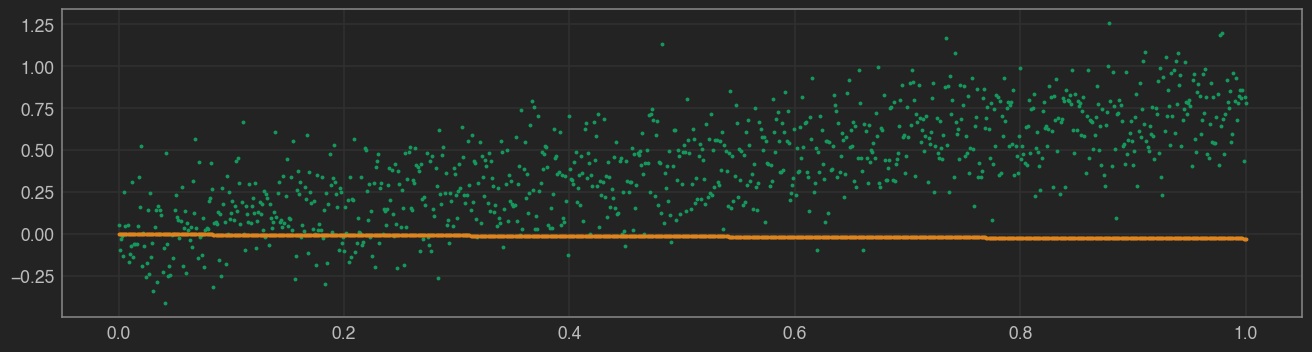

In [21]:
plt.plot(X, y, '.')
plt.plot(X, y_pred, '.')

We can now feed this data to the neuron in the `fit` step. 

In [22]:
neuron.fit(
    X, 
    y,
    epochs=50
)

Epoch 1/50
32/32 [==============================] - 0s 744us/step - loss: 0.2448
Epoch 2/50
32/32 [==============================] - 0s 642us/step - loss: 0.2072
Epoch 3/50
32/32 [==============================] - 0s 1ms/step - loss: 0.1756
Epoch 4/50
32/32 [==============================] - 0s 708us/step - loss: 0.1499
Epoch 5/50
32/32 [==============================] - 0s 573us/step - loss: 0.1296
Epoch 6/50
32/32 [==============================] - 0s 581us/step - loss: 0.1135
Epoch 7/50
32/32 [==============================] - 0s 567us/step - loss: 0.1012
Epoch 8/50
32/32 [==============================] - 0s 558us/step - loss: 0.0917
Epoch 9/50
32/32 [==============================] - 0s 567us/step - loss: 0.0843
Epoch 10/50
32/32 [==============================] - 0s 555us/step - loss: 0.0785
Epoch 11/50
32/32 [==============================] - 0s 593us/step - loss: 0.0744
Epoch 12/50
32/32 [==============================] - 0s 566us/step - loss: 0.0711
Epoch 13/50
32/32 [========

Notice how the values for the loss function go down. It seems the neuron has learned something. Now we can use this single-neuron network to predict the target values:

In [23]:
y_pred = neuron.predict(X)

32/32 [==============================] - 0s 466us/step


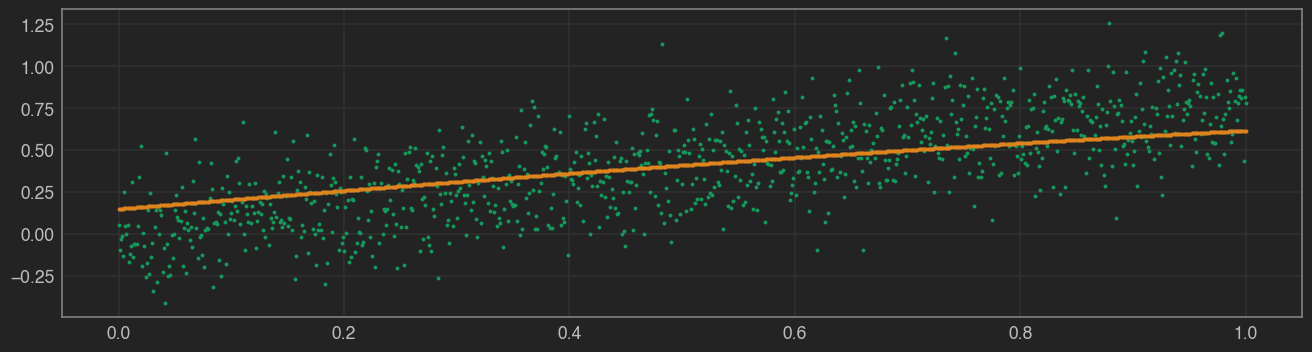

In [24]:
plt.plot(X, y, '.')
plt.plot(X, y_pred, '.')

After seeing the data more than a few times, the network has (sort of) learned to model the underlying linear relationship. And a look at the weight for the input - the parameter we have optimized in the learning phase - reflects this:

In [25]:
neuron.get_weights()

[array([[0.56894666]], dtype=float32), array([0.1513265], dtype=float32)]

### Activation Functions

After computing a weighted sum of the inputs, the result is passed through an **activation function** (also called **transfer function**) to determine the final output of the neuron. 

This is somewhat similar to a biological neuron being triggered if the inputs exceed a certain threshold. In practice a simple step function that switches from 0 to 1 at some threshold value would not work with gradient-based optimization methods, since it is not continuously differentiable and has a derivative of 0 otherwise. 

Some desirable properties in an activation function include:

- _nonlinear_ – When the activation function is non-linear, then a two-layer neural network can be proven to be a [universal function approximator](https://en.m.wikipedia.org/wiki/Universal_approximation_theorem).
- _range_: When the range of the activation function is finite, gradient-based training methods tend to be more stable. When the range is infinite, training is generally more efficient.
- _continuously differentiable_: Desirable for gradient-based optimization methods. 


Below we visualize examples of a few commonly used activation functions.

In [26]:
x = numpy.linspace(-2.0, 2.0, 100)


<AxesSubplot: >

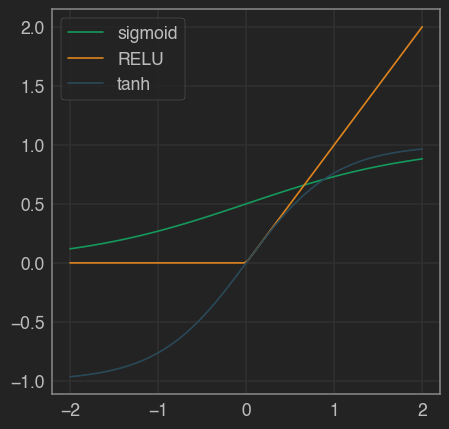

In [27]:
pandas.DataFrame(
    {
        "sigmoid": keras.backend.eval(
            keras.activations.sigmoid(x)
        ),
        "RELU": keras.backend.eval(
            keras.activations.relu(x)
        ),
        "tanh": keras.backend.eval(
            keras.activations.tanh(x)
        )
    },
    index=x
).plot(figsize=(5,5))

You may have noticed that the number of trainable parameters for the one-input neuron above is not one but two. This is due to a mechanism called **bias**. One can think of **bias** as receiving an additional weighted input from a neuron that always outputs 1. [As explained here in detail](https://stackoverflow.com/questions/2480650/role-of-bias-in-neural-networks), this is helpful for shifting the activation function left/right.

![](https://i.stack.imgur.com/t2mC3.png)

_The effect of bias on the activation function. [(Source)](https://stackoverflow.com/questions/2480650/role-of-bias-in-neural-networks)_

### Understanding the Layers

Let's revisit the image classifier network and discuss each of its layers. Here is a summary of the layers:

In [28]:
net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


If you prefer a graphical summary - this one was made with the [Netron](https://github.com/lutzroeder/netron) application:

![](graphics/MNIST_classifier.svg)

**Flatten**

The `Flatten` layer does what it says: In goes a multidimensional array, out comes a 1D-vector. In this case we turn the image into a vector of grayscale values.

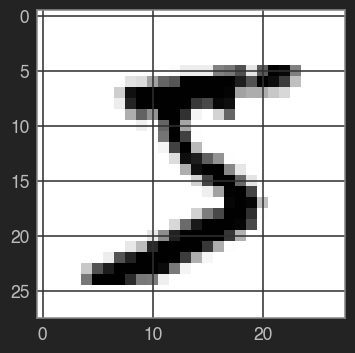

In [29]:
example_img = X_train[0].copy()
plt.imshow(example_img, cmap="binary")

1/1 [==============================] - 0s 50ms/step


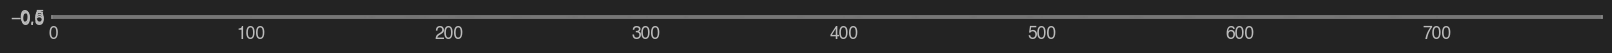

In [30]:
inputs = keras.layers.Input(shape=(28,28))
flat = keras.models.Model(
    inputs=inputs, 
    outputs=keras.layers.Flatten()(inputs)
).predict(
    example_img.reshape(1,28,28)
)

plt.figure(figsize=(20,1))
plt.imshow(flat, cmap="binary")

**Dense**

A **fully-connected layer**. Every following neuron receives the input from every preceding neuron. Fully-connected layers are highly flexible in what they can learn. They are also computationally expensive, resulting in many weights to be trained.

![](graphics/fully-connected-layer.png)

[Source](https://www.researchgate.net/figure/The-structure-of-the-fully-connected-layer-a-b-and-the-data-dependency-c_fig2_318025612)

**Dropout**

Adding a **dropout layer** is a **regularization** technique, i.e. a strategy against overfitting. When the `Dropout` layer has been added, randomly selected neurons from the previous layer are ignored - "dropped out" - during training. On the forward pass, these neurons do not pass output to the following layer, and any weight updates are not applied to the neuron on the backward pass. [This article](https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/) goes into more detail on why this is beneficial for training robust models that are less prone to overfitting.

The **dropout rate** is one more parameter that can be tuned, but using a small rate such as 0.2 is a good starting point.


**Softmax Activation**

The last layer of the network is a fully-connected layer with as many neurons as there are classes to predict. Since we are doing classification, the activation function of this layer is special: The [softmax](https://en.m.wikipedia.org/wiki/Softmax_function) function maps the outputs of the neurons in this layer to **class probabilities** - numbers between 0.0 and 1.0 that sum to 1.0. The network then predicts the most likely class.


### Compiling

After defining the network architecture, it needs to be compiled to be trainable.

In [31]:
net.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Notice the parameters:
- **optimizer**: The optimization algorithm that iteratively updates the network's weights to minimize the loss function, usually by some version of gradient descent. Algorithms can differ in their performance. The [Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) optimizer is a good default choice. Selecting and tuning optimizers is an advanced topic.
- **loss**: The objective function that is minimized to train the network.
- **metrics**: Additional error metrics tracked during training.

### Training

In the training phase, the network is provided with labelled data points. It is evaluated and its output is compared to the desired labels. The **loss function** quantifies the error. 

While training, the optimizer iteratively adjusts the weights of the network - easily thousands of them - to minimize the loss function. It usually does this by some variant of **gradient descent**: In the search for a minimum, the gradient or slope of the error function is computed at the current parameters, then a step is taken in the negative direction of the gradient. The length of the step is called the **learning rate**.

![](https://cdn-images-1.medium.com/max/800/1*KQVi812_aERFRolz_5G3rA.gif) 

_Gradient descent for fitting a linear model with the squared error as loss function. [Source](https://medium.com/onfido-tech/machine-learning-101-be2e0a86c96a)_

In [32]:
%%time
net.fit(
    X_train, 
    y_train, 
    epochs=5,
    batch_size=64
)

Epoch 1/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0371 - accuracy: 0.9880
Epoch 2/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0343 - accuracy: 0.9886
Epoch 3/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0312 - accuracy: 0.9895
Epoch 4/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0286 - accuracy: 0.9905
Epoch 5/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0303 - accuracy: 0.9902
CPU times: user 9.87 s, sys: 1.56 s, total: 11.4 s
Wall time: 5.41 s


Note the additional parameters:
- **epochs**: A epoch has passed when the network has processed the entire training set. Multiple passes over the training set are usually necessary to train the network.
- **batch size**:  Rather than feeding one observation to the network, computing the output, computing the loss, and updating the weights, we can feed multiple inputs in a batch and update the network weights based on the entire batch. Processing one batch is called an **iteration**. Batches enable efficient use of the GPU, and the size of the GPU sets a limit to useful batch sizes. The size of the batch influences the training time, the error achieved, and the gradients during training. There is no general rule of thumb as to which batch size works out best. 


### Evaluation

Since it already knows its objective function and metrics, the network has a simple method to evaluate its performance with a test set:

In [33]:
net.evaluate(
    X_test, 
    y_test,
    verbose=True
)


313/313 [==============================] - 0s 960us/step - loss: 0.0746 - accuracy: 0.9795


[0.0746031254529953, 0.9794999957084656]

This is how to obtain the class predictions:

In [34]:
y_pred = numpy.argmax(net.predict(X_test), axis=1)

313/313 [==============================] - 0s 688us/step


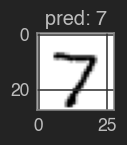

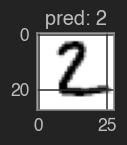

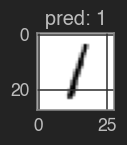

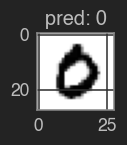

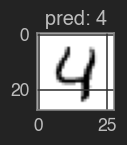

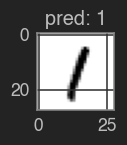

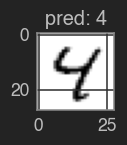

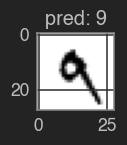

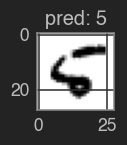

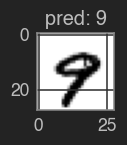

In [35]:
for i in range(10):
    plt.figure(figsize=(1,1))
    plt.imshow(X_test[i], cmap="binary")
    plt.title(f"pred: {y_pred[i]}")

## References

- [McCullough-Pitts Neuron with Keras](https://chatbotslife.com/keras-in-a-single-mcculloch-pitts-neuron-317397cccd45)
- [Deep Learning in Python](https://www.datacamp.com/community/tutorials/deep-learning-python)
- [Dropout Regularization in Deep Learning Models With Keras](https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/)

---
_This notebook is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/). Copyright © 2018-2021 [Point 8 GmbH](https://point-8.de)_